In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
!ls
os.chdir("drive/MyDrive/Snake Images")
!ls


Mounted at /content/drive
drive  sample_data
models	test  train


In [ ]:
import torchvision
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_x = []
train_y = []
test_x = []
test_y = []

filenames = [name for name in os.listdir("train/Non Venomous")]

for filename in filenames:
    img = torchvision.io.read_image('train/Non Venomous/' + filename)
    if img.shape[0] != 3 or img.shape[1] != 400 or img.shape[2] != 400:
        continue
    img = torchvision.transforms.Grayscale()(img)
    img = torchvision.transforms.Resize((40,40))(img)
    train_x.append(img)
    train_y.append(0)

filenames = [name for name in os.listdir("train/Venomous")]

for filename in filenames:
    img = torchvision.io.read_image('train/Venomous/' + filename)
    if img.shape[0] != 3 or img.shape[1] != 400 or img.shape[2] != 400:
        continue
    img = torchvision.transforms.Grayscale()(img)
    img = torchvision.transforms.Resize((40,40))(img)
    train_x.append(img)
    train_y.append(1)
    

filenames = [name for name in os.listdir("test/Non Venomous")]

for filename in filenames:
    img = torchvision.io.read_image('test/Non Venomous/' + filename)
    if img.shape[0] != 3 or img.shape[1] != 400 or img.shape[2] != 400:
        continue
    img = torchvision.transforms.Grayscale()(img)
    img = torchvision.transforms.Resize((40,40))(img)
    test_x.append(img)
    test_y.append(0)


filenames = [name for name in os.listdir("test/Venomous")]

for filename in filenames:
    img = torchvision.io.read_image('test/Venomous/' + filename)
    if img.shape[0] != 3 or img.shape[1] != 400 or img.shape[2] != 400:
        continue
    img = torchvision.transforms.Grayscale()(img)
    img = torchvision.transforms.Resize((40,40))(img)
    test_x.append(img)
    test_y.append(1)

train_x, train_y = torch.stack(train_x), torch.tensor(train_y, dtype=torch.long)
test_x, test_y = torch.stack(test_x), torch.tensor(test_y, dtype=torch.long)
train_x = train_x / 255
test_x = test_x / 255

train_shuffle_order = torch.randperm(len(train_x))
train_shuffle_order = train_shuffle_order.tolist()

train_x = train_x[train_shuffle_order].cuda()
train_y = train_y[train_shuffle_order].cuda()
test_x = test_x.cuda()
test_y = test_y.cuda()

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

torch.Size([1692, 1, 40, 40]) torch.Size([1692]) torch.Size([267, 1, 40, 40]) torch.Size([267])


In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 64, 3)
        self.pool = nn.MaxPool2d(4, 4)
        self.bn1 = nn.BatchNorm2d(64)
        self.bn2 = nn.BatchNorm2d(8)
        self.conv2 = nn.Conv2d(64, 8, 3)
        # self.conv3 = nn.Conv2d(16, 16, 3)
        # self.conv4 = nn.Conv2d(16, 16, 3)
        # self.conv5 = nn.Conv2d(16, 16, 3)
        # self.conv6 = nn.Conv2d(16, 16, 3)
        # self.conv7 = nn.Conv2d(16, 16, 3)
        # self.conv8 = nn.Conv2d(16, 3, 3)
        self.fc1 = nn.Linear(392, 16)
        self.fc2 = nn.Linear(16, 2)
        self.dropout = torch.nn.Dropout(0.4)

    def forward(self, x):
        x = F.leaky_relu(self.conv1(x))
        x = self.bn1(x)
        x = self.dropout(x)
        x = self.pool(x)
        x = F.leaky_relu(self.conv2(x))
        x = self.bn2(x)
        x = self.dropout(x)
        # x = self.pool(x)
        # x = F.leaky_relu(self.conv3(x))
        # x = self.pool(x)
        # x = F.leaky_relu(self.conv4(x))
        # x = self.pool(x)
        # x = F.leaky_relu(self.conv5(x))
        # x = F.leaky_relu(self.conv6(x))
        # x = self.pool(x)
        # x = F.leaky_relu(self.conv7(x))
        # x = F.leaky_relu(self.conv8(x))
        # x = self.pool(x)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.leaky_relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


net = Net().cuda()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [ ]:
#del net
#del optimizer
#del outputs
#del inputs
#del labels
#del loss
#torch.cuda.empty_cache()

In [ ]:
average_test_loss = 0.0
average_train_loss = 0.0
average_test_accuracy = 0.0
average_train_accuracy = 0.0

0 loss 5.897056479695598e-06 accuracy 88.70192307692308
torch.Size([64, 2])
torch.Size([64, 2])
torch.Size([64, 2])
torch.Size([64, 2])
test loss 0.13663345254167325 accuracy 66.40625
1 loss 6.489379460109143e-06 accuracy 90.38461538461539
torch.Size([64, 2])
torch.Size([64, 2])
torch.Size([64, 2])
torch.Size([64, 2])
test loss 0.11481625147278389 accuracy 63.671875
2 loss 5.721931978053925e-06 accuracy 89.60336538461539
torch.Size([64, 2])
torch.Size([64, 2])
torch.Size([64, 2])
torch.Size([64, 2])
test loss 0.12154673007002732 accuracy 64.0625
3 loss 6.188440178417848e-06 accuracy 89.78365384615384
torch.Size([64, 2])
torch.Size([64, 2])
torch.Size([64, 2])
torch.Size([64, 2])
test loss 0.1266591518211347 accuracy 63.671875
4 loss 6.521234483769218e-06 accuracy 88.28125
torch.Size([64, 2])
torch.Size([64, 2])
torch.Size([64, 2])
torch.Size([64, 2])
test loss 0.14031856885039437 accuracy 66.796875
5 loss 6.962761290434576e-06 accuracy 89.0625
torch.Size([64, 2])
torch.Size([64, 2])
to

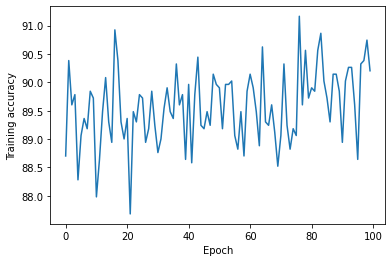

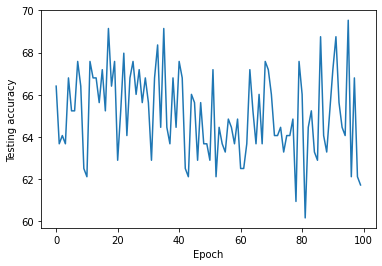

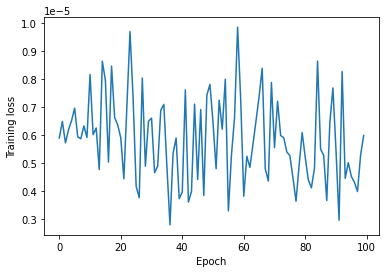

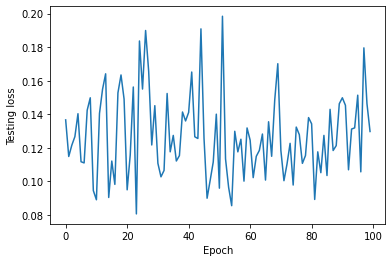

65.08984375
89.57271634615383
0.12721219256459487
5.857943683081426e-06


In [ ]:
train_loss = []
test_loss = []
test_accuracy = []
train_accuracy = []

batch_size = 64

def test():
  running_loss = 0.0
  count = 0
  samples = 0
  net.eval()
  batch_count = len(test_x) // batch_size
  for i in range(batch_count):
      inputs = test_x[batch_size * i : batch_size * (i + 1)]
      labels = test_y[batch_size * i : batch_size * (i + 1)]
      #zero the parameter gradients
      optimizer.zero_grad()
      outputs = net(inputs)
      yhat = torch.argmax(outputs.detach(), axis=-1)
      
      count += torch.sum((yhat == labels)).detach().item()
      loss = criterion(outputs, labels)
      outputs = outputs.detach()
      loss = loss.detach()
      running_loss += loss.item() * len(inputs)
      samples += len(inputs)
      accuracy = 100*count/samples
      running_loss /= samples
  test_loss.append(running_loss)
  test_accuracy.append(accuracy)
  print("test", "loss", running_loss, "accuracy", accuracy)

for epoch in range(100):  # loop over the dataset multiple times
    running_loss = 0.0
    count = 0
    samples = 0
    net.train()
    batch_count = len(train_x) // batch_size
    train_shuffle_order = torch.randperm(len(train_x))
    train_shuffle_order = train_shuffle_order.tolist()
    for i in range(batch_count):
        inds = train_shuffle_order[batch_size * i : batch_size * (i + 1)]
        inputs = train_x[inds]
        labels = train_y[inds]
        optimizer.zero_grad()
        outputs = net(inputs)
        yhat = torch.argmax(outputs.detach(), axis=-1)
        count += torch.sum((yhat == labels)).detach().item()
        loss = criterion(outputs, labels) * len(inputs)
        outputs = outputs.detach()
        loss.backward()
        optimizer.step()
        loss = loss.detach()
        running_loss += loss.item()
        samples += len(inputs)
        running_loss = running_loss / samples
        accuracy = 100*count/samples
        running_loss /= samples
    train_loss.append(running_loss)
    train_accuracy.append(accuracy)
    print(epoch, "loss", running_loss, "accuracy", accuracy)
    test()


plt.plot(range(len(train_accuracy)), train_accuracy)
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.show()
plt.plot(range(len(test_accuracy)), test_accuracy)
plt.xlabel('Epoch')
plt.ylabel('Testing accuracy')
plt.show()
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.show()
plt.plot(range(len(test_loss)), test_loss)
plt.xlabel('Epoch')
plt.ylabel('Testing loss')
plt.show()
print(np.mean(test_accuracy))
print(np.mean(train_accuracy))
print(np.mean(test_loss))
print(np.mean(train_loss))